# Image Segmentation with Watershed Algorithm
Ref: https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html

In [ ]:
from google.colab import files as FILE
from google.colab.patches import cv2_imshow # for image display
import os
import requests
"""Download da imagem de teste"""
img_data = requests.get('https://docs.opencv.org/4.x/water_coins.jpg').content

with open('coins.png', 'wb') as handler:
    handler.write(img_data)

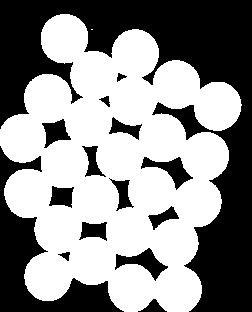

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# We start with finding an approximate estimate of the coins. For that, we can use the Otsu's binarization.
img = cv.imread('coins.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
cv2_imshow(thresh)

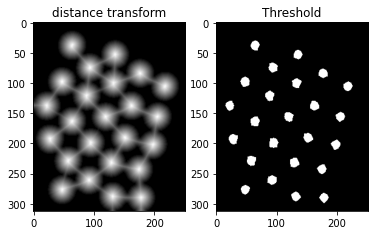

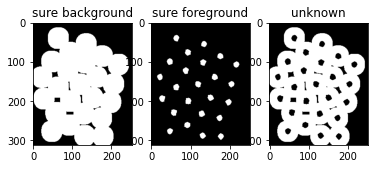

In [ ]:
# 1º passo = rotular a região que temos certeza ser o foreground;
# 2º passo = rotular a região que temos certeza ser o background;
# 3º passo = rotular as regiões de incerteza (fore ou back?) com label 0;
# 4º passo = aplicar o algoritmo watershed
# Resultado = marcador será atualizado com os rótulos que demos e os limites dos objetos terão valor -1;

# noise removal
kernel = np.ones((3,3),np.uint8)
# Now we need to remove any small white noises in the image. For that we can use morphological opening.
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

# plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(1, 2, 1)
plt.title('distance transform')
plt.imshow(dist_transform, cmap="gray")
plt.subplot(1,2, 2)
plt.title('Threshold')
plt.imshow(sure_fg, cmap="gray")
plt.show()

plt.subplot(1, 3, 1)
plt.title('sure background')
plt.imshow(sure_bg, cmap="gray")
plt.subplot(1, 3, 2)
plt.title('sure foreground')
plt.imshow(sure_fg, cmap="gray")
plt.subplot(1, 3, 3)
plt.title('unknown')
plt.imshow(unknown, cmap="gray")
plt.show()


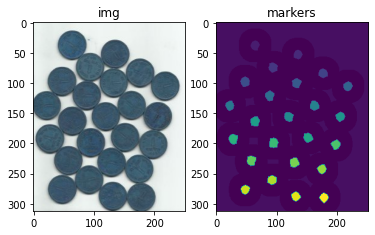

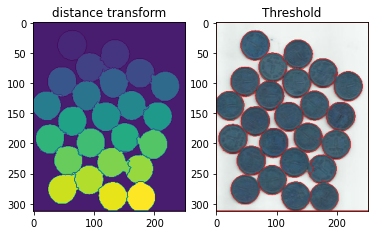

In [ ]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

# Now our marker is ready. It is time for final step, apply watershed. Then marker image will be modified. The boundary region will be marked with -1.
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]


plt.subplot(1, 2, 1)
plt.title('distance transform')
plt.imshow(markers)
plt.subplot(1,2, 2)
plt.title('Threshold')
plt.imshow(img)
plt.show()